<a href="https://colab.research.google.com/github/hsmu-jeongeun/deep-learning-practice/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.utils import plot_model
import numpy as np

### 2. 데이터 준비

In [2]:
!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16]

fatal: destination path 'data' already exists and is not an empty directory.


In [10]:
import pandas as pd
df = pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [11]:
df.shape

(470, 17)

### 3. 구조 결정

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

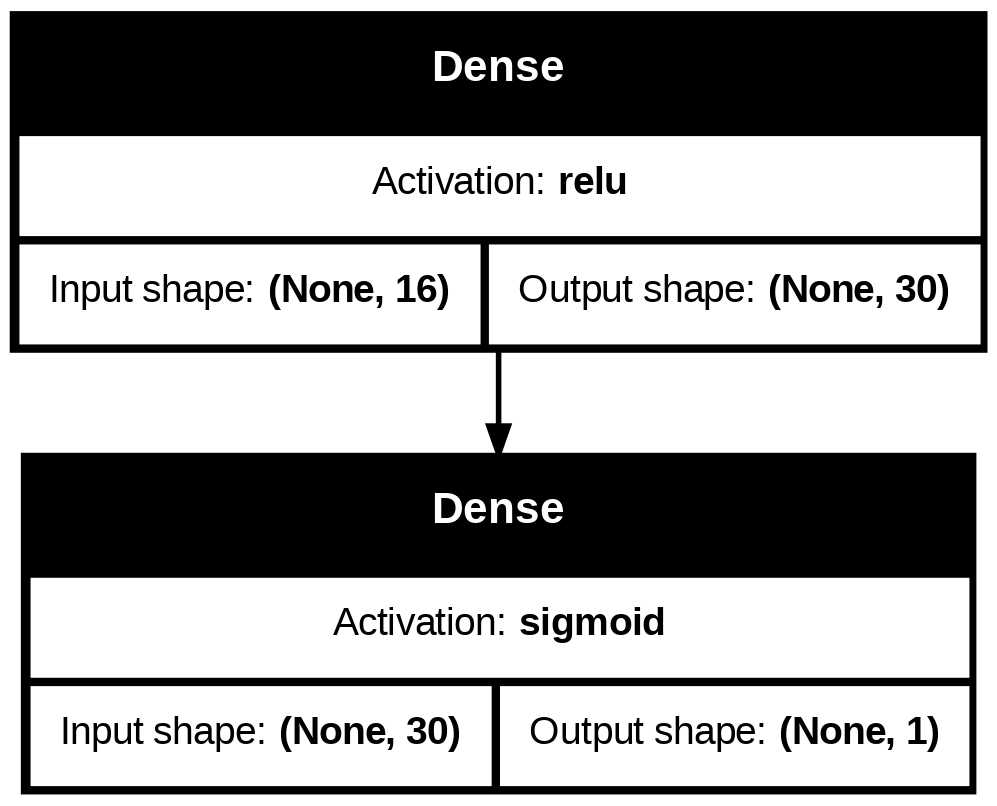

In [7]:
# model = Sequential([
#   Input(shape=(16,))
#   ,Dense(30, activation='relu')
#   ,Dense(1, activation= 'sigmoid')
# ])

model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model,show_shapes=True, show_layer_activations=True)

### 4. 모델 실행

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1638 - loss: 6.3550
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4006 - loss: 1.0185 
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8224 - loss: 0.5523
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.4406 
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.3998 


In [18]:
history.history

{'accuracy': [0.17234042286872864,
  0.6212766170501709,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091],
 'loss': [4.881708145141602,
  0.7035940885543823,
  0.4670601189136505,
  0.44931426644325256,
  0.44489336013793945]}

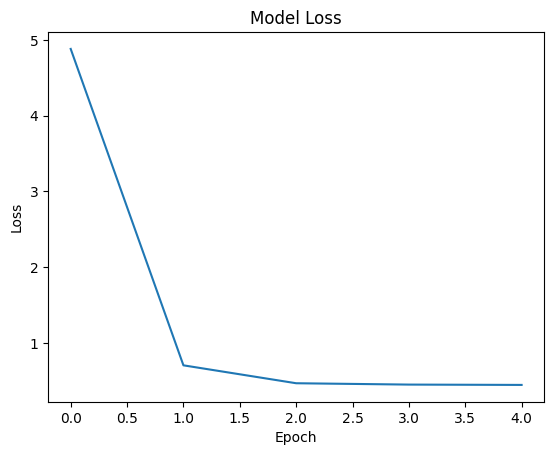

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

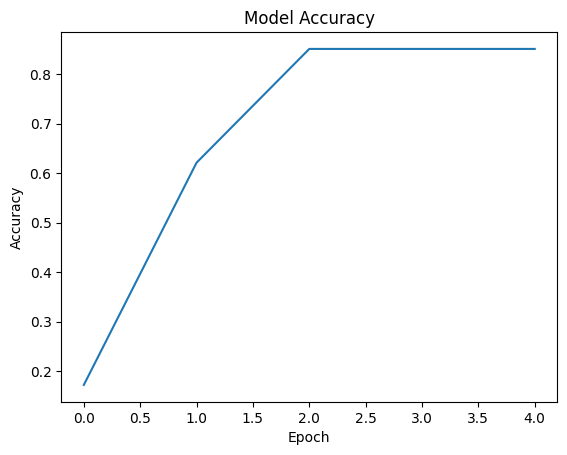

In [23]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [24]:
loss, accuracy = model.evaluate(X, y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8313 - loss: 0.4842 
Test Loss: 0.4430
Test Accuracy: 0.8511


문제 1 : train, test 데이터셋을 나누는 코드를 추가하고 다시 실행해보세요
- 24번째 셀의 evaluate()의 파라미터값도 추가한 변수 중 테스트 데이터셋으로 변경

문제 2: model2라는 변수에 아래 조건을 만족하는 모델을 저장하고 학습해서 결과를 비교해보세요
- 입력층 동일
- 은닉층1 : 64개의 뉴런, 활성화함수 ReLU 사용
- 은닉층2 : 32개의 뉴런, 활성화함수 ReLU 사용
- 출력층 동일